In [26]:
from sklearn.metrics import mean_squared_error as mse
from keras.models import load_model
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.callbacks import ModelCheckpoint
from keras.layers import *
from keras.models import Sequential
from keras.optimizers import Adam
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True
)

csv_path, _ = os.path.splitext(zip_path)

df = pd.read_csv(csv_path)


In [27]:
df = df[5::6]

df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')

In [28]:
temp = df[
    'T (degC)'
]


In [29]:
def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)


WINDOW_SIZE = 5

X, y = df_to_X_y(temp, WINDOW_SIZE)

In [30]:
X_train, y_train = X[:60000], y[:60000]
X_val, y_val = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]

X_train.shape, y_train.shape, X_val.shape,y_val.shape, X_test.shape, y_test.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [31]:
model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# the only the lowest validation lost
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(
    learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model1.fit(X_train, y_train, validation_data=(
    X_val, y_val), epochs=10, callbacks=[cp])


model1 = load_model('model1/')

Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 55.8092 - root_mean_squared_error: 7.4706INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 5s 2ms/step - loss: 55.8092 - root_mean_squared_error: 7.4706 - val_loss: 1.9992 - val_root_mean_squared_error: 1.4139
Epoch 2/10
1870/1875 [============================>.] - ETA: 0s - loss: 3.7316 - root_mean_squared_error: 1.9317INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 4s 2ms/step - loss: 3.7272 - root_mean_squared_error: 1.9306 - val_loss: 0.6643 - val_root_mean_squared_error: 0.8151
Epoch 3/10
1855/1875 [============================>.] - ETA: 0s - loss: 1.1655 - root_mean_squared_error: 1.0796INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 4s 2ms/step - loss: 1.1623 - root_mean_squared_error: 1.0781 - val_loss: 0.5576 - val_root_mean_squared_error: 0.7467
Epoch 4/10
1858/1875 [============================>.] - ETA: 0s - loss: 0.7867 - root_mean_squared_error: 0.8870INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.7852 - root_mean_squared_error: 0.8861 - val_loss: 0.5328 - val_root_mean_squared_error: 0.7299
Epoch 5/10
1838/1875 [============================>.] - ETA: 0s - loss: 0.6952 - root_mean_squared_error: 0.8338INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.6951 - root_mean_squared_error: 0.8337 - val_loss: 0.5099 - val_root_mean_squared_error: 0.7140
Epoch 6/10
1855/1875 [============================>.] - ETA: 0s - loss: 0.6706 - root_mean_squared_error: 0.8189INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.6695 - root_mean_squared_error: 0.8182 - val_loss: 0.4956 - val_root_mean_squared_error: 0.7040
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6581 - root_mean_squared_error: 0.8112 - val_loss: 0.4971 - val_root_mean_squared_error: 0.7051
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6513 - root_mean_squared_error: 0.8071 - val_loss: 0.4967 - val_root_mean_squared_error: 0.7048
Epoch 9/10
1858/1875 [============================>.] - ETA: 0s - loss: 0.6463 - root_mean_squared_error: 0.8039INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.6476 - root_mean_squared_error: 0.8047 - val_loss: 0.4944 - val_root_mean_squared_error: 0.7031
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6437 - root_mean_squared_error: 0.8023 - val_loss: 0.5016 - val_root_mean_squared_error: 0.7082


1875/1875 [==============================] - 2s 697us/step


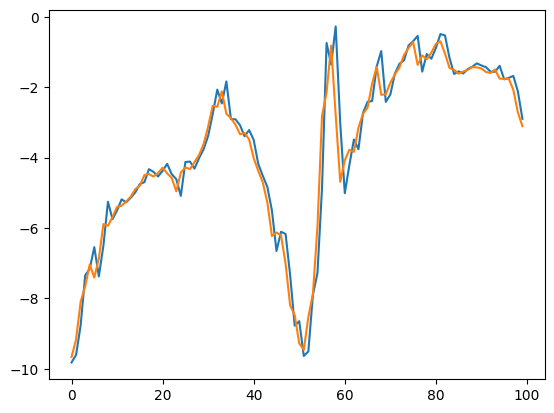

157/157 [==============================] - 0s 705us/step


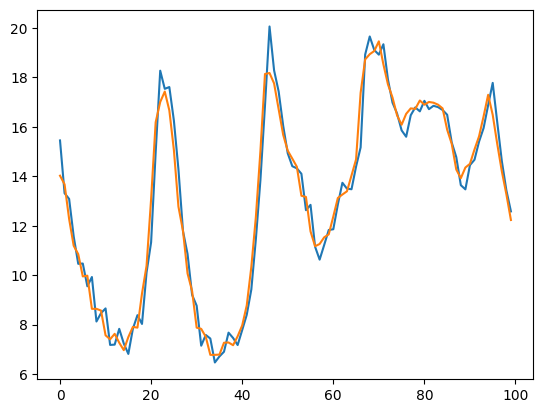

159/159 [==============================] - 0s 694us/step


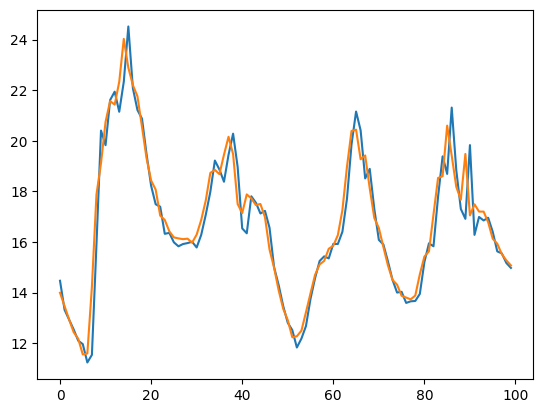

In [33]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(
    data={'Train Predictions': train_predictions, 'Actuals': y_train})

plt.plot(train_results['Train Predictions'][:100])
plt.plot(train_results['Actuals'][:100])
plt.show()

############ validation results ############
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(
    data={'Val Predictions': val_predictions, 'Actuals': y_val})

plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])
plt.show()

############ test results ############
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(
    data={'Test Predictions': test_predictions, 'Actuals': y_test})

plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])
plt.show()